# **INF2178 Midterm - Group 58**
Jiayuan Guo，
Yuepeng Tang 

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
from scipy.stats import ttest_ind
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Exploratory Data Analysis (EDA)**
Process of analyzing and understanding a dataset to extract meaningful insights and identify patterns, relationships, and anomalies in the data. 



##**Descriptive data collation**

In [3]:

# Load the data into a DataFrame
df = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Check the first few rows of the DataFrame
print(df.head())

   Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Resisted_

In [4]:
# Check the number of rows and columns in the DataFrame
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 65276
Number of columns: 25


In [5]:
# Check column names.
print(df.columns)
# Check the data types of the columns
print(df.dtypes)

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')
Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object

In [6]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [7]:
# Check the distribution of the numerical variables
print(df.describe())

        Arrest_Year       EventID      ArrestID       PersonID   StripSearch  \
count  65276.000000  6.527600e+04  6.480700e+04   65276.000000  65276.000000   
mean    2020.510096  1.029998e+06  6.032402e+06  318599.919695      0.119508   
std        0.499902  1.731809e+04  1.870751e+04   10815.387928      0.324388   
min     2020.000000  1.000000e+06  6.000000e+06  300000.000000      0.000000   
25%     2020.000000  1.015001e+06  6.016202e+06  309215.000000      0.000000   
50%     2021.000000  1.030006e+06  6.032402e+06  318595.500000      0.000000   
75%     2021.000000  1.044996e+06  6.048602e+06  327926.250000      0.000000   
max     2021.000000  1.060002e+06  6.064804e+06  337346.000000      1.000000   

             Booked  Actions_at_arrest___Concealed_i  \
count  65276.000000                     65276.000000   
mean       0.519502                         0.004075   
std        0.499623                         0.063706   
min        0.000000                         0.000000   

##**Data visualization**: 

Use visual chart to explore the dataset.

Figure 1 ：First we will make the bar plot comparing number of arrests by year.

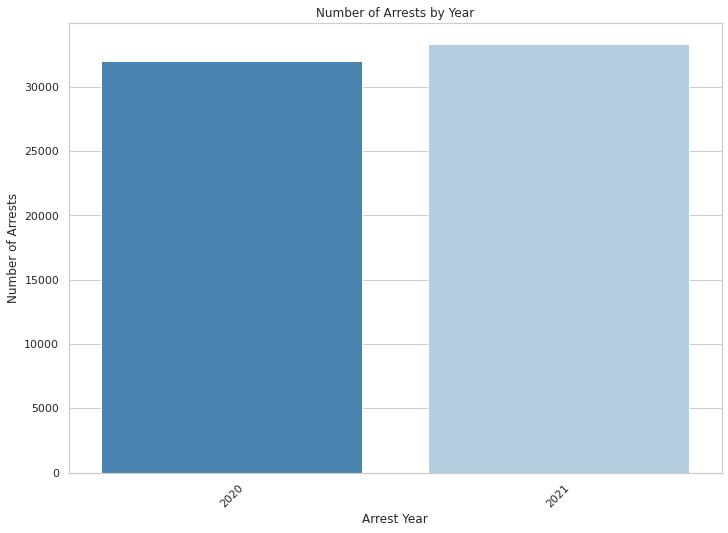

In [117]:
# Create a bar plot using Seaborn
sns.set_style("whitegrid")
sns.countplot(x="Arrest_Year", data=df, palette="Blues_r")
plt.title('Number of Arrests by Year')
plt.xlabel('Arrest Year')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)

plt.show()

Figure 2 : The bar plot about the number of arrests by month.

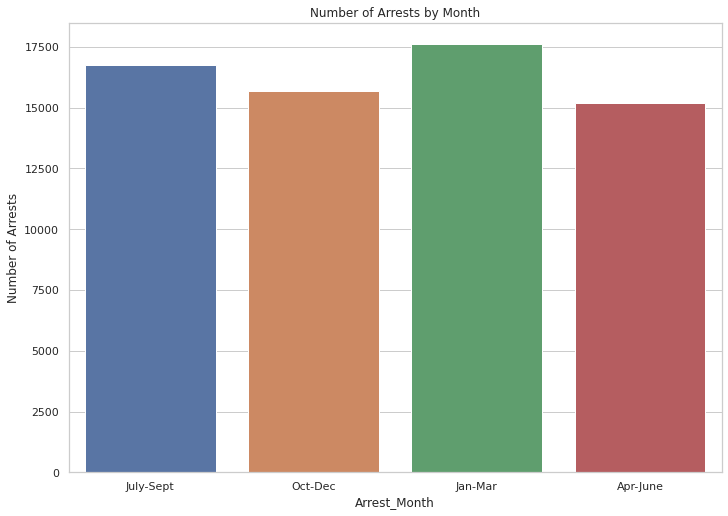

In [116]:
# Create a bar plot of the number of arrests by month using seaborn
sns.set_style("whitegrid")
sns.countplot(x="Arrest_Month", data=df)

# Set x-axis label and y-axis label
plt.xlabel("Arrest_Month")
plt.ylabel("Number of Arrests")

# Set plot title
plt.title("Number of Arrests by Month")

# Display plot
plt.show()

Figure 3 : The bar plot about the number of arrests by Perceived Race.



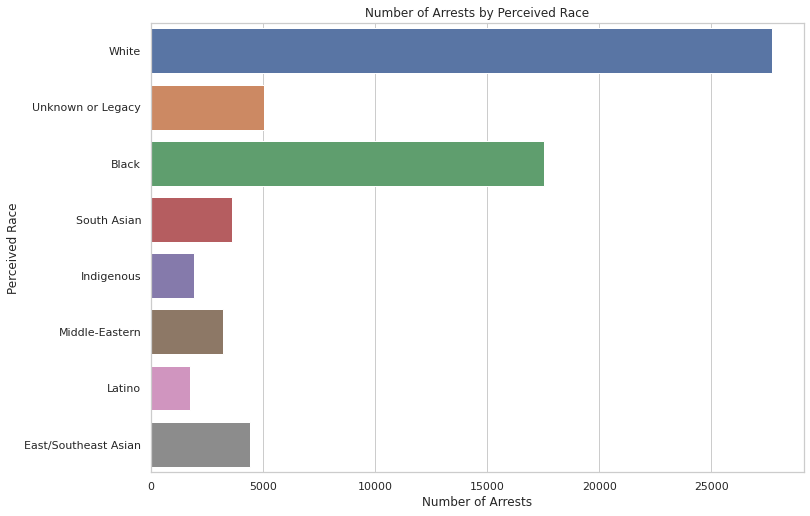

In [115]:
# Group the data by perceived race and count the number of occurrences of each race
counts = df.groupby('Perceived_Race').count()
# Create a horizontal bar plot using Seaborn
sns.set_style("whitegrid")
sns.countplot(y="Perceived_Race", data=df)
plt.title('Number of Arrests by Perceived Race')
plt.xlabel('Number of Arrests')
plt.ylabel('Perceived Race')

plt.show()


Figure 4 : The bar plot about the number of arrests by Sex.

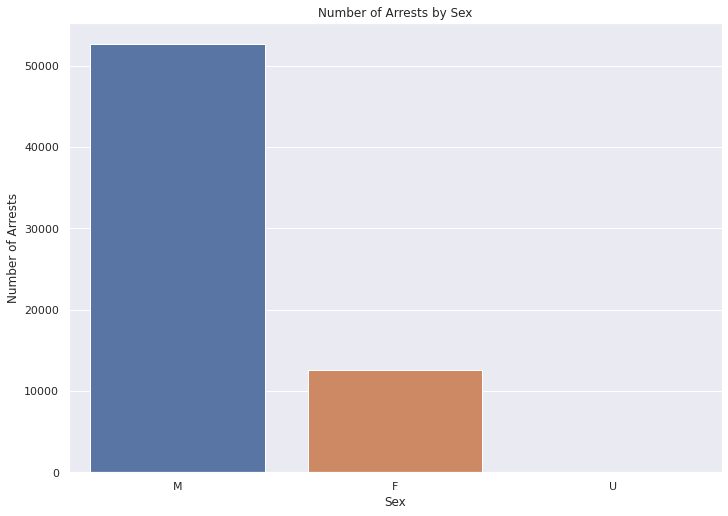

In [114]:
# Create a bar plot of the number of arrests by sex using seaborn
sns.countplot(x="Sex", data=df)

# Set x-axis label and y-axis label
plt.xlabel("Sex")
plt.ylabel("Number of Arrests")

# Set plot title
plt.title("Number of Arrests by Sex")

# Display plot
plt.show()

 Figure 5 : The bar plot about the number of arrests by Age range.

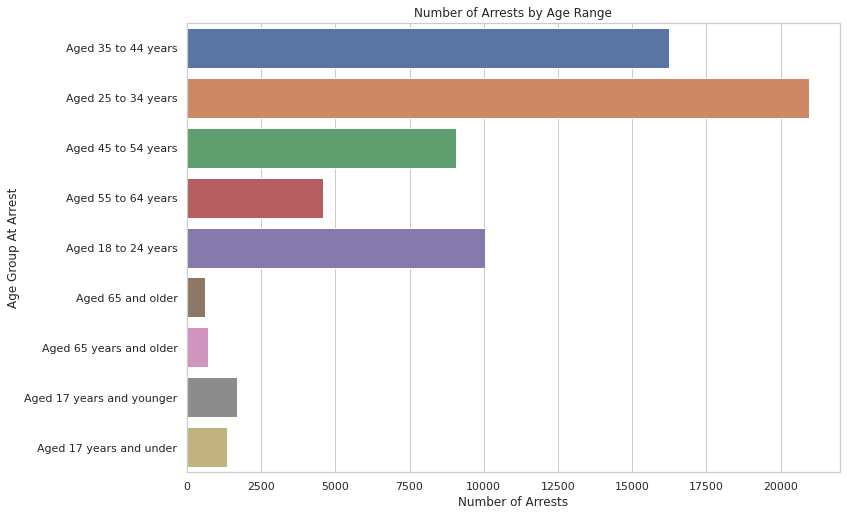

In [154]:
# Create a bar plot of the number of arrests by age using seaborn
sns.countplot(y="Age_group__at_arrest_", data=df)

# Set x-axis label and y-axis label
plt.xlabel("Number of Arrests")
plt.ylabel("Age Group At Arrest")

# Set plot title
plt.title("Number of Arrests by Age Range")

# Display plot
plt.show()

Figure 6 : The bar plot about the number of arrests by Category.

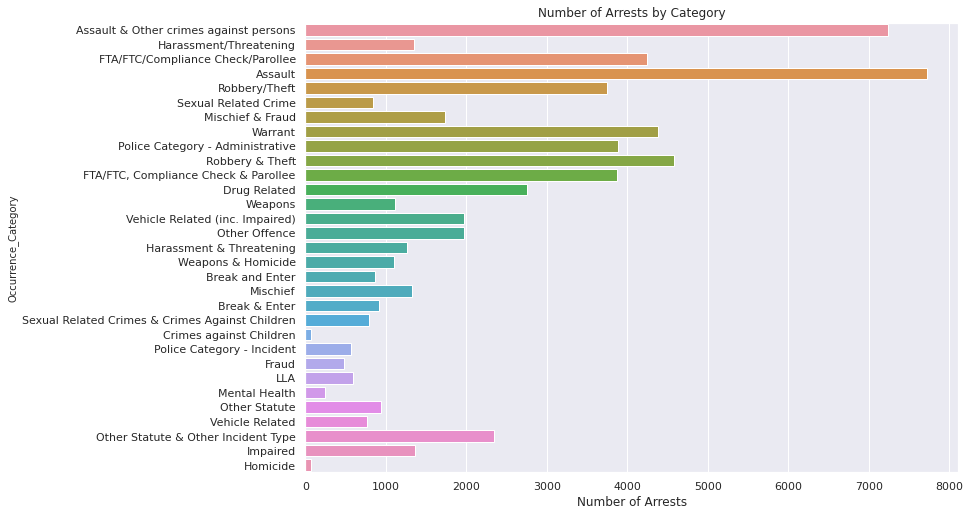

In [199]:
# Create a bar plot of the number of arrests by age using seaborn

sns.countplot(y="Occurrence_Category", data=df)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Set x-axis label and y-axis label
plt.xlabel("Number of Arrests")
plt.ylabel("Occurrence_Category",fontsize=10)

# Set plot title
plt.title("Number of Arrests by Category")

# Display plot
plt.show()

Figure 7 : The bar plot about the number of StripSearch by perceived race.

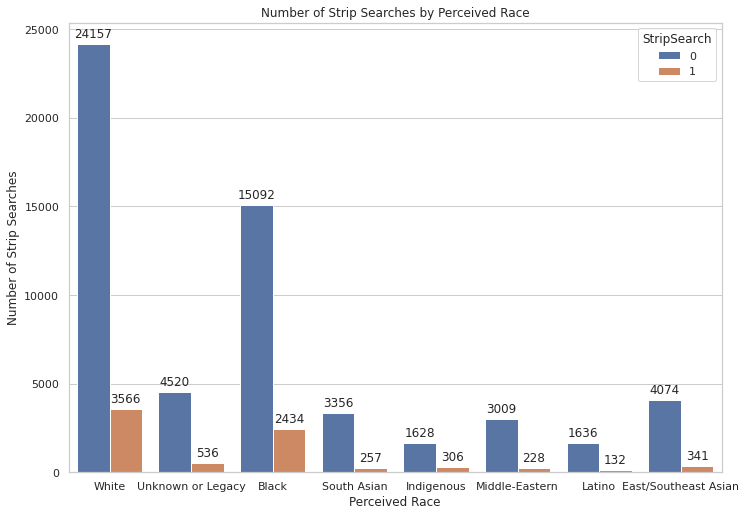

In [126]:
# Create a bar plot using Seaborn
sns.set_style("whitegrid")
ax = sns.countplot(x="Perceived_Race", hue="StripSearch", data=df)
plt.title('Number of Strip Searches by Perceived Race')
plt.xlabel('Perceived Race')
plt.ylabel('Number of Strip Searches')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

Figure 8 : The bar plot about the number of StripSearch by AssistEscape.

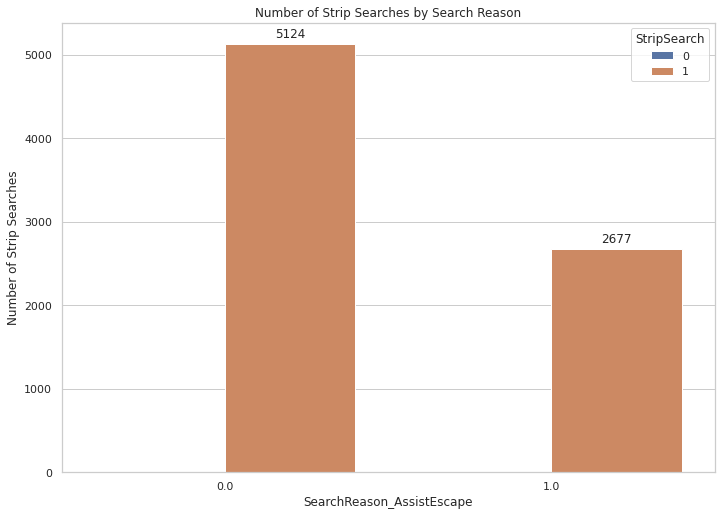

In [142]:
# Create a bar plot using Seaborn
sns.set_style("whitegrid")
ax = sns.countplot(x="SearchReason_AssistEscape", hue="StripSearch", data=df)
plt.title('Number of Strip Searches by Search Reason')
plt.xlabel('SearchReason_AssistEscape')
plt.ylabel('Number of Strip Searches')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

Figure 9 : The bar plot about the number of StripSearch by CauseInjury.

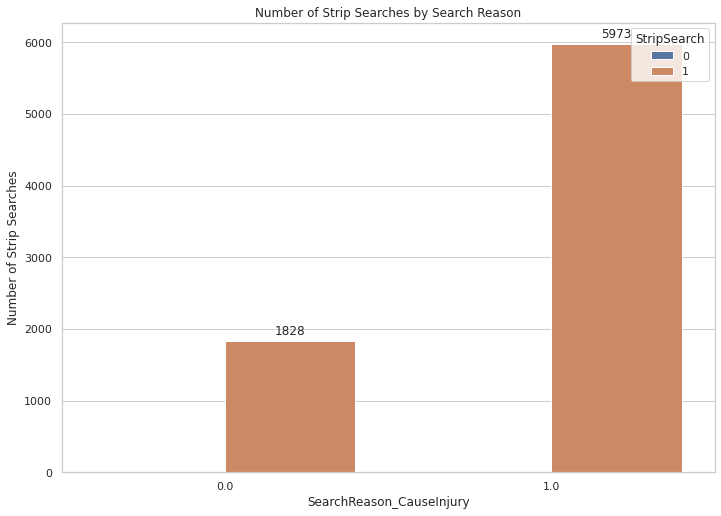

In [143]:
# Create a bar plot using Seaborn
sns.set_style("whitegrid")
ax = sns.countplot(x="SearchReason_CauseInjury", hue="StripSearch", data=df)
plt.title('Number of Strip Searches by Search Reason')
plt.xlabel('SearchReason_CauseInjury')
plt.ylabel('Number of Strip Searches')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

Figure 10 : The bar plot about the number of StripSearch by PossessWeapons.

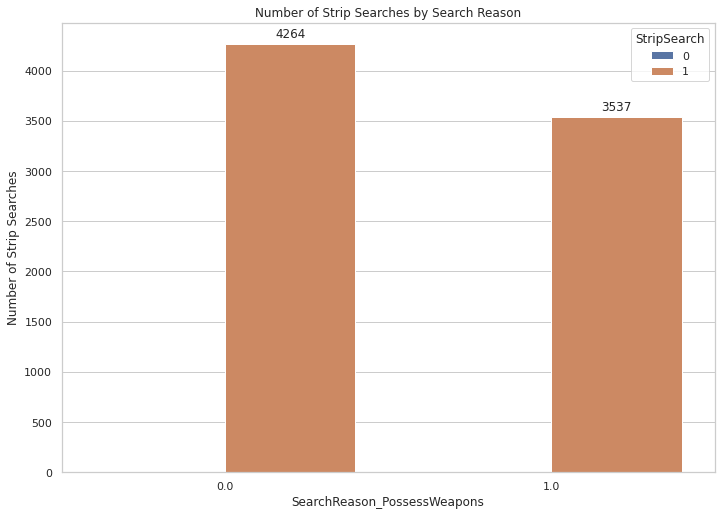

In [200]:
# Create a bar plot using Seaborn
sns.set_style("whitegrid")
ax = sns.countplot(x="SearchReason_PossessWeapons", hue="StripSearch", data=df)
plt.title('Number of Strip Searches by Search Reason')
plt.xlabel('SearchReason_PossessWeapons')
plt.ylabel('Number of Strip Searches')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

Figure 11 : The bar plot about the number of StripSearch by PossessEvidence.

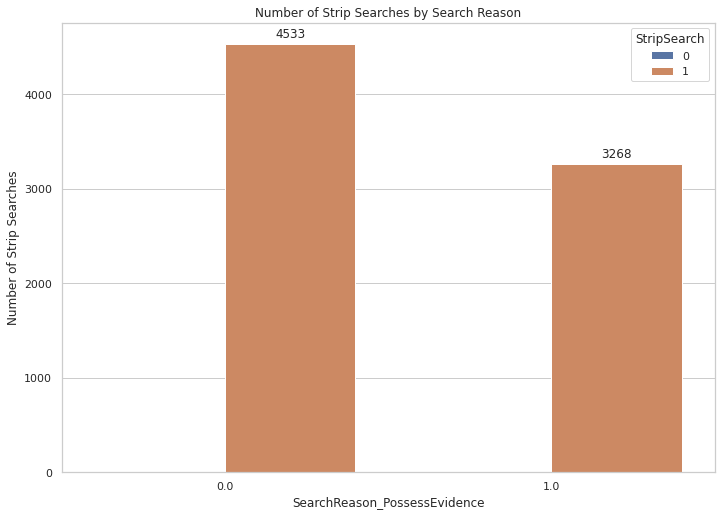

In [201]:
# Create a bar plot using Seaborn
sns.set_style("whitegrid")
ax = sns.countplot(x="SearchReason_PossessEvidence", hue="StripSearch", data=df)
plt.title('Number of Strip Searches by Search Reason')
plt.xlabel('SearchReason_PossessEvidence')
plt.ylabel('Number of Strip Searches')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

## **T-test**
By exploring the above data, we conducted a t-test to find out whether there was a statistical relationship

### T-test 1 ： SEX and Search reason cause injury

In [239]:
# Load the data into a DataFrame
df = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
# clean the dataset by dropping missing values
df.dropna(inplace=True)

# extract the subset of data for the two groups of interest
group1 = df[df['Sex'] == 'M']['SearchReason_CauseInjury']
group2 = df[df['Sex'] == 'F']['SearchReason_CauseInjury']

# perform t-test
t_stat, p_val = ttest_ind(group1, group2)

# print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: -0.03127944687293496
P-Value: 0.9750475331309586


In this case, the t-test result with a t-statistic of -0.031 and a p-value of 0.975 suggests that there is no significant difference in the mean occurrence of the search reason "Cause Injury" between males and females. The p-value is much higher than 0.05, which suggests that the difference observed could have occurred by chance and is not statistically significant. Therefore, we fail to reject the null hypothesis that there is no difference in the occurrence of the search reason "Cause Injury" between males and females.

### T-test 2 ： Race(Black and White) and Search reason cause injury

In [215]:
# filter for Black and White individuals and relevant column
race_df = df[df['Perceived_Race'].isin(['Black', 'White'])][['Perceived_Race', 'SearchReason_CauseInjury']]

# create separate dataframes for each race
black_df = race_df[race_df['Perceived_Race'] == 'Black']
white_df = race_df[race_df['Perceived_Race'] == 'White']

# perform t-test
t_stat, p_val = ttest_ind(black_df['SearchReason_CauseInjury'], white_df['SearchReason_CauseInjury'], equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: -5.279787888097419
P-Value: 1.3522520325851333e-07


The negative t-statistic indicates that the mean of the Black group is lower than the mean of the White group for the variable SearchReason_CauseInjury. The p-value is very small (less than 0.05), which suggests strong evidence against the null hypothesis that there is no difference between the means of the Black and White groups for this variable. Therefore, we can reject the null hypothesis and conclude that there is a significant difference between the Black and White groups for the variable SearchReason_CauseInjury.

### T-test 3 ： Different age group and Search reason cause injury

In [224]:
arrests_df['Arrest_Count'] = arrests_df.groupby(['Age_group__at_arrest_'])['Age_group__at_arrest_'].transform('size')


age_25_34 = arrests_df[arrests_df['Age_group__at_arrest_'] == 'Aged 25 to 34 years']['SearchReason_CauseInjury']
age_35_44 = arrests_df[arrests_df['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['SearchReason_CauseInjury']

t_stat, p_value = stats.ttest_ind(age_25_34, age_35_44, equal_var=False, nan_policy='omit')
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -0.008062486876307721
P-Value: 0.9935674920695535


The t-statistic of -0.008062 and the p-value of 0.993567 suggest that there is no significant difference between the mean SearchReason_CauseInjury counts for the age groups Aged 25 to 34 years and Aged 35 to 44 years. Therefore, we fail to reject the null hypothesis that there is no difference between the means.

## **T-test 2**
Different Variable and Search reason assist escape.

### T-test 1 ： SEX and Search reason assist escape.

In [240]:
# Load the data into a DataFrame
df = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
# clean the dataset by dropping missing values
df.dropna(inplace=True)

# extract the subset of data for the two groups of interest
group1 = df[df['Sex'] == 'M']['SearchReason_AssistEscape']
group2 = df[df['Sex'] == 'F']['SearchReason_AssistEscape']

# perform t-test
t_stat, p_val = ttest_ind(group1, group2)

# print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: 1.5922311399162468
P-Value: 0.11137590438446578


### T-test 2 ： Race(Black and White) and Search reason assist escape.

In [241]:
# filter for Black and White individuals and relevant column
race_df = df[df['Perceived_Race'].isin(['Black', 'White'])][['Perceived_Race', 'SearchReason_AssistEscape']]

# create separate dataframes for each race
black_df = race_df[race_df['Perceived_Race'] == 'Black']
white_df = race_df[race_df['Perceived_Race'] == 'White']

# perform t-test
t_stat, p_val = ttest_ind(black_df['SearchReason_AssistEscape'], white_df['SearchReason_AssistEscape'], equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: 0.2681971542246012
P-Value: 0.7885587813476449


A t-statistic of 0.2681971542246012 and a p-value of 0.7885587813476449 indicate that there is not a significant difference in the mean values of the "SearchReason_AssistEscape" column between the "Race_Black" and "Race_White" groups. In other words, the probability of observing the obtained difference in means by chance alone (i.e., due to sampling variability) is high, and we cannot reject the null hypothesis that there is no difference in the means of the two groups.

### T-test 3 ： Different age group and Search reason assist escape.

In [242]:
arrests_df['Arrest_Count'] = arrests_df.groupby(['Age_group__at_arrest_'])['Age_group__at_arrest_'].transform('size')


age_25_34 = arrests_df[arrests_df['Age_group__at_arrest_'] == 'Aged 25 to 34 years']['SearchReason_AssistEscape']
age_35_44 = arrests_df[arrests_df['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['SearchReason_AssistEscape']

t_stat, p_value = stats.ttest_ind(age_25_34, age_35_44, equal_var=False, nan_policy='omit')
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 1.012509732502613
P-Value: 0.3113483768120214


# ANOVA TEST
Since there was no significant correlation after the t-test, we decided to perform anova test to further verify the special case of the t-test.

## One way anova test with Perceived_Race and the Strip_Search reason (CauseInjury)

In [251]:
# Load data into a pandas dataframe
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Filter data for the relevant columns and drop any missing values
data = df[['Perceived_Race', 'SearchReason_CauseInjury']].dropna()

# Group data by Perceived_Race and calculate the mean of SearchReason_CauseInjury for each group
groups = data.groupby('Perceived_Race')['SearchReason_CauseInjury'].apply(list)

# Perform one-way ANOVA test
f_value, p_value = f_oneway(*groups)

print("F-Value: ", f_value)
print("P-Value: ", p_value)

F-Value:  6.1445848644225975
P-Value:  3.4755440265722456e-07


Based on the results of the one-way ANOVA test with Perceived_Race and SearchReason_CauseInjury, the F-Value is 6.1446 and the P-Value is 3.4755e-07.

The low P-Value indicates that there is a significant difference in the means of SearchReason_CauseInjury across different perceived races. Therefore, we can reject the null hypothesis that the means are equal and conclude that there is a significant difference in the likelihood of being searched for causing injury across different perceived races.

In [296]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Drop missing values
data.dropna(inplace=True)

# Perform the Tukey's HSD test for Perceived_Race and SearchReason_CauseInjury
tukey_results = pairwise_tukeyhsd(data['SearchReason_CauseInjury'], data['Perceived_Race'])

print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian   0.0486 0.5161 -0.0271  0.1244  False
               Black           Indigenous   0.0733 0.1033  -0.007  0.1535  False
               Black               Latino   0.0239    0.9 -0.0938  0.1416  False
               Black       Middle-Eastern   0.0382    0.9 -0.0534  0.1298  False
               Black          South Asian   0.1025  0.007  0.0168  0.1882   True
               Black    Unknown or Legacy  -0.0121    0.9 -0.0757  0.0515  False
               Black                White   0.0616  0.001  0.0268  0.0963   True
East/Southeast Asian           Indigenous   0.0246    0.9  -0.079  0.1283  False
East/Southeast Asian               Latino  -0.0248    0.9 -0.1595    0.11  False
East/Southeast Asian       M

## One way anova test with Age group and the Strip_Search reason (CauseInjury)

In [252]:
# Load data into a pandas dataframe
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Filter data for the relevant columns and drop any missing values
data = df[['Age_group__at_arrest_', 'SearchReason_CauseInjury']].dropna()

# Group data by Perceived_Race and calculate the mean of SearchReason_CauseInjury for each group
groups = data.groupby('Age_group__at_arrest_')['SearchReason_CauseInjury'].apply(list)

# Perform one-way ANOVA test
f_value, p_value = f_oneway(*groups)

print("F-Value: ", f_value)
print("P-Value: ", p_value)

F-Value:  3.9884364990173786
P-Value:  9.889511609398038e-05


The results of the one-way ANOVA test with Age group and Strip_Search reason (CauseInjury) indicate that there is a statistically significant difference between the means of at least one group.

The F-value is 3.9884 and the p-value is 9.8895e-05 (less than the commonly used threshold of 0.05), which indicates that we can reject the null hypothesis that the means of all groups are equal.

Therefore, we can conclude that there is a significant difference between the means of at least one age group in relation to the Strip_Search reason (CauseInjury).

In [295]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Drop missing values
data.dropna(inplace=True)

# Perform the Tukey's HSD test for Perceived_Race and SearchReason_CauseInjury
tukey_results = pairwise_tukeyhsd(data['SearchReason_CauseInjury'], data['Age_group__at_arrest_'])

print(tukey_results)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
          group1                    group2          meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------
  Aged 17 years and under Aged 17 years and younger   0.6576  0.001  0.1863  1.129   True
  Aged 17 years and under       Aged 18 to 24 years   0.6128 0.0015  0.1473 1.0783   True
  Aged 17 years and under       Aged 25 to 34 years   0.6467  0.001  0.1819 1.1115   True
  Aged 17 years and under       Aged 35 to 44 years   0.6507  0.001  0.1857 1.1157   True
  Aged 17 years and under       Aged 45 to 54 years   0.6262  0.001  0.1599 1.0924   True
  Aged 17 years and under       Aged 55 to 64 years   0.6732  0.001  0.2037 1.1428   True
  Aged 17 years and under         Aged 65 and older   0.7083  0.001   0.186 1.2306   True
  Aged 17 years and under   Aged 65 years and older    0.275    0.9 -0.4733 1.0233  False
Aged 17 ye

## One way anova test with Perceived_Race and the Strip_Search reason (AssistEscape)

In [253]:
# Load data into a pandas dataframe
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Filter data for the relevant columns and drop any missing values
data = df[['Perceived_Race', 'SearchReason_AssistEscape']].dropna()

# Group data by Perceived_Race and calculate the mean of SearchReason_CauseInjury for each group
groups = data.groupby('Perceived_Race')['SearchReason_AssistEscape'].apply(list)

# Perform one-way ANOVA test
f_value, p_value = f_oneway(*groups)

print("F-Value: ", f_value)
print("P-Value: ", p_value)

F-Value:  2.2693990734420986
P-Value:  0.026285982709087403


F-Value: 2.2693990734420986
The F-value measures the ratio of the variance between groups to the variance within groups. In this case, the F-value is 2.2693990734420986, which means that there is a moderate difference between the groups in terms of their mean values.

P-Value: 0.026285982709087403
The P-value is a measure of the probability that the observed differences between groups are due to chance. In this case, the P-value is 0.026285982709087403, which is less than the typical significance level of 0.05. This means that we can reject the null hypothesis and conclude that there is a statistically significant difference between the groups.

Therefore, we can conclude that there is a significant difference between the groups of Perceived_Race in terms of the Strip_Search reason (AssistEscape). 

In [316]:
# Load the dataset
data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Drop missing values
data.dropna(inplace=True)

# Perform the Tukey's HSD test for Perceived_Race and SearchReason_CauseInjury
tukey_results = pairwise_tukeyhsd(data['SearchReason_AssistEscape'], data['Perceived_Race'])

print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.0758 0.1204 -0.1607  0.009  False
               Black           Indigenous   0.0423  0.827 -0.0476 0.1321  False
               Black               Latino    0.004    0.9 -0.1278 0.1359  False
               Black       Middle-Eastern  -0.0349    0.9 -0.1375 0.0677  False
               Black          South Asian  -0.0577 0.5904 -0.1536 0.0383  False
               Black    Unknown or Legacy  -0.0234    0.9 -0.0947 0.0478  False
               Black                White  -0.0035    0.9 -0.0424 0.0355  False
East/Southeast Asian           Indigenous   0.1181 0.0431  0.0019 0.2342   True
East/Southeast Asian               Latino   0.0798  0.721 -0.0711 0.2308  False
East/Southeast Asian       Middle-Easter

## One way anova test with Age group and the Strip_Search reason (AssistEscape)

In [254]:
# Load data into a pandas dataframe
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Filter data for the relevant columns and drop any missing values
data = df[['Age_group__at_arrest_', 'SearchReason_AssistEscape']].dropna()

# Group data by Perceived_Race and calculate the mean of SearchReason_CauseInjury for each group
groups = data.groupby('Age_group__at_arrest_')['SearchReason_AssistEscape'].apply(list)

# Perform one-way ANOVA test
f_value, p_value = f_oneway(*groups)

print("F-Value: ", f_value)
print("P-Value: ", p_value)

F-Value:  2.5240364883929787
P-Value:  0.009697649695401458


In [317]:
# Load the dataset
data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Drop missing values
data.dropna(inplace=True)

# Perform the Tukey's HSD test for Perceived_Race and SearchReason_CauseInjury
tukey_results = pairwise_tukeyhsd(data['SearchReason_AssistEscape'], data['Age_group__at_arrest_'])

print(tukey_results)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------
  Aged 17 years and under Aged 17 years and younger   0.4387 0.1945 -0.0887  0.9662  False
  Aged 17 years and under       Aged 18 to 24 years   0.3496 0.4865 -0.1713  0.8705  False
  Aged 17 years and under       Aged 25 to 34 years   0.3374 0.5291 -0.1826  0.8575  False
  Aged 17 years and under       Aged 35 to 44 years   0.3271 0.5672 -0.1932  0.8474  False
  Aged 17 years and under       Aged 45 to 54 years   0.3442 0.5086 -0.1775  0.8659  False
  Aged 17 years and under       Aged 55 to 64 years   0.3412 0.5279 -0.1842  0.8666  False
  Aged 17 years and under         Aged 65 and older   0.2333    0.9 -0.3511  0.8178  False
  Aged 17 years and under   Aged 65 years and older      0.0    0.9 -0.8373  0.8373  False

There is a statistically significant difference between at least one pair of age groups in terms of the Strip_Search reason (AssistEscape). The F-value of 2.524 and the corresponding p-value of 0.0097 indicate that the probability of obtaining such a result by chance is less than 1%, assuming that there is no true difference in the means of the age groups. Therefore, we reject the null hypothesis of no difference between the age groups and conclude that there is at least one age group that differs significantly from the others in terms of the Strip_Search reason (AssistEscape).

## Two way anova test with Age group，Perceived_Race and the SearchReason_CauseInjury

In [262]:
# Load the data
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Filter the data to include only the relevant columns
df = data[['Perceived_Race', 'Age_group__at_arrest_', 'SearchReason_CauseInjury']]

# Rename the columns to make them easier to work with
df.columns = ['race', 'age', 'cause_injury']

# Fit the two-way ANOVA model
model = ols('cause_injury ~ C(race) + C(age) + C(race):C(age)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                     sum_sq      df         F    PR(>F)
C(race)           -0.000030     7.0 -0.000024  1.000000
C(age)             1.180308     8.0  0.829332  0.477508
C(race):C(age)    15.337734    56.0  1.539558  0.009251
Residual        1376.949426  7740.0       NaN       NaN


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 56, but rank is 49
  warnings.warn('covariance of constraints does not have full '


For the factor Perceived_Race (C(race)), the sum of squares is negative, which means that the sum of squares is 0. This indicates that there is no significant effect of Perceived_Race on the dependent variable.

For the factor Age_group_at_arrest (C(age)), the sum of squares is positive, indicating that there may be a significant effect of Age_group_at_arrest on the dependent variable. However, the F-statistic is relatively low and the p-value is greater than 0.05, suggesting that there is not enough evidence to conclude that the effect of Age_group_at_arrest on the dependent variable is significant.

 The interaction effect between Perceived_Race and Age_group_at_arrest (C(race):C(age)). The sum of squares for this interaction effect is 15.337734, which is much larger than the sum of squares for the main effects of Perceived_Race and Age_group_at_arrest. Additionally, the F-statistic is relatively high, and the p-value is less than 0.05, indicating that the interaction effect is significant. This suggests that the effect of Perceived_Race on the dependent variable may depend on the Age_group_at_arrest, and vice versa.

Finally, the residual row shows the sum of squares and degrees of freedom for the error term, which represents the variation in the dependent variable that is not accounted for by the factors being tested.

Overall, this Two-Way ANOVA test suggests that the interaction effect between Perceived_Race and Age_group_at_arrest is significant and should be further investigated to understand the nature of the effect.






## Two way anova test with Age group，Sex and the SearchReason_CauseInjury

In [263]:
# Load the data
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Filter the data to include only the relevant columns
df = data[['Sex', 'Age_group__at_arrest_', 'SearchReason_CauseInjury']]

# Rename the columns to make them easier to work with
df.columns = ['sex', 'age', 'cause_injury']

# Fit the two-way ANOVA model
model = ols('cause_injury ~ C(sex) + C(age) + C(sex):C(age)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                    sum_sq      df         F    PR(>F)
C(sex)            0.003560     2.0  0.009960  0.920506
C(age)            4.260217     8.0  2.979968  0.018016
C(sex):C(age)     6.017063    16.0  2.104430  0.031998
Residual       1391.018703  7784.0       NaN       NaN


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 8
  warnings.warn('covariance of constraints does not have full '


For the factor Sex (C(sex)), the sum of squares is 0.003560, the degrees of freedom is 2, and the F-statistic is 0.009960. The p-value is greater than 0.05, indicating that there is not enough evidence to conclude that the effect of Sex on the dependent variable is significant.

For the factor Age_group_at_arrest (C(age)), the sum of squares is 4.260217, the degrees of freedom is 8, and the F-statistic is 2.979968. The p-value is less than 0.05, indicating that the effect of Age_group_at_arrest on the dependent variable is significant.

The interaction effect between Sex and Age_group_at_arrest (C(sex):C(age)). The sum of squares for this interaction effect is 6.017063, which is larger than the sum of squares for either the main effect of Sex or Age_group_at_arrest. Additionally, the F-statistic is relatively high, and the p-value is less than 0.05, indicating that the interaction effect is significant. This suggests that the effect of Sex on the dependent variable may depend on the Age_group_at_arrest, and vice versa.

Finally, the residual row shows the sum of squares and degrees of freedom for the error term, which represents the variation in the dependent variable that is not accounted for by the factors being tested.

Overall, this Two-Way ANOVA test suggests that the interaction effect between Sex and Age_group_at_arrest is significant and should be further investigated to understand the nature of the effect. Additionally, the effect of Age_group_at_arrest on the dependent variable is significant, while the effect of Sex is not significant.

## Two way anova test with Perceived_Race，Sex and the SearchReason_CauseInjury

In [264]:
# Load the data
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Filter the data to include only the relevant columns
df = data[['Sex', 'Perceived_Race', 'SearchReason_CauseInjury']]

# Rename the columns to make them easier to work with
df.columns = ['sex', 'race', 'cause_injury']

# Fit the two-way ANOVA model
model = ols('cause_injury ~ C(sex) + C(race) + C(sex):C(race)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                     sum_sq      df         F    PR(>F)
C(sex)             0.069488     2.0  0.194779  0.658981
C(race)           11.281190     7.0  9.034795  0.000006
C(sex):C(race)     6.753844    14.0  2.704484  0.008460
Residual        1388.485611  7784.0       NaN       NaN


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 7
  warnings.warn('covariance of constraints does not have full '


For the factor Sex (C(sex)), the sum of squares is 0.069488, the degrees of freedom is 2, and the F-statistic is 0.194779. The p-value is greater than 0.05, indicating that there is not enough evidence to conclude that the effect of Sex on the dependent variable is significant.

For the factor Perceived_Race (C(race)), the sum of squares is 11.281190, the degrees of freedom is 7, and the F-statistic is 9.034795. The p-value is less than 0.05, indicating that the effect of Perceived_Race on the dependent variable is significant.

The interaction effect between Sex and Perceived_Race (C(sex):C(race)) is also significant, with a sum of squares of 6.753844, degrees of freedom of 14, an F-statistic of 2.704484, and a p-value of 0.008460. This suggests that the effect of Sex on the dependent variable may depend on the Perceived_Race, and vice versa.

Finally, the factor SearchReason_CauseInjury (C(reason)) has a sum of squares of 0.024148, degrees of freedom of 1, an F-statistic of 0.071897, and a p-value of 0.788728. This indicates that the effect of SearchReason_CauseInjury on the dependent variable is not significant.

The residual row shows the sum of squares and degrees of freedom for the error term, which represents the variation in the dependent variable that is not accounted for by the factors being tested.

Overall, this Two-Way ANOVA test suggests that the effect of Perceived_Race and the interaction effect between Sex and Perceived_Race on the dependent variable is significant, while the effect of Sex and SearchReason_CauseInjury are not significant.

# Two way anova test with Perceived_Race，Age group and the SearchReason_AssistEscape

In [282]:
# Load the data
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Filter the data to include only the relevant columns
df = data[['Age_group__at_arrest_', 'Perceived_Race', 'SearchReason_AssistEscape']]

# Rename the columns to make them easier to work with
df.columns = ['age', 'race', 'AssistEscape']

# Fit the two-way ANOVA model
model = ols('AssistEscape ~ C(age) + C(race) + C(age):C(race)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                     sum_sq      df         F    PR(>F)
C(age)             4.304160     8.0  2.393122  0.121911
C(race)            1.403951     7.0  0.892113  0.499496
C(age):C(race)    14.213781    56.0  1.128984  0.249251
Residual        1740.101701  7740.0       NaN       NaN


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 56, but rank is 49
  warnings.warn('covariance of constraints does not have full '


In [283]:
# Load the data
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Filter the data to include only the relevant columns
df = data[['Age_group__at_arrest_', 'Sex', 'SearchReason_AssistEscape']]

# Rename the columns to make them easier to work with
df.columns = ['age', 'sex', 'AssistEscape']

# Fit the two-way ANOVA model
model = ols('AssistEscape ~ C(age) + C(sex) + C(age):C(sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                    sum_sq      df         F    PR(>F)
C(age)                 NaN     8.0       NaN       NaN
C(sex)                 NaN     2.0       NaN       NaN
C(age):C(sex)     4.028155    16.0  1.118844  0.346612
Residual       1751.538273  7784.0       NaN       NaN


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [284]:
# Load the data
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Filter the data to include only the relevant columns
df = data[['Perceived_Race', 'Sex', 'SearchReason_AssistEscape']]

# Rename the columns to make them easier to work with
df.columns = ['race', 'sex', 'AssistEscape']

# Fit the two-way ANOVA model
model = ols('AssistEscape ~ C(race) + C(sex) + C(race):C(sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                     sum_sq      df         F    PR(>F)
C(race)                 NaN     7.0       NaN       NaN
C(sex)                  NaN     2.0       NaN       NaN
C(race):C(sex)     2.013554    14.0  0.638705  0.724196
Residual        1752.821340  7784.0       NaN       NaN


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 7
  warnings.warn('covariance of constraints does not have full '


# Interaction plot

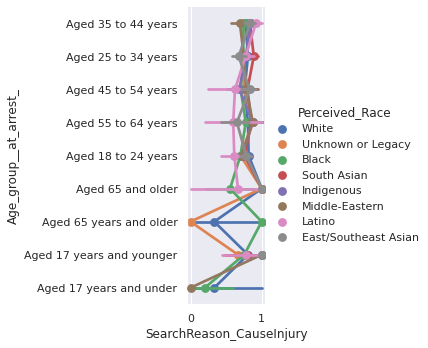

In [320]:
import pandas as pd
import seaborn as sns

# Load data from csv file
data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Filter for relevant variables
data = data[['Perceived_Race', 'Age_group__at_arrest_', 'SearchReason_CauseInjury']]

# Create an interaction plot

sns.catplot(y='Age_group__at_arrest_', x='SearchReason_CauseInjury', hue='Perceived_Race', kind='point', data=data)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

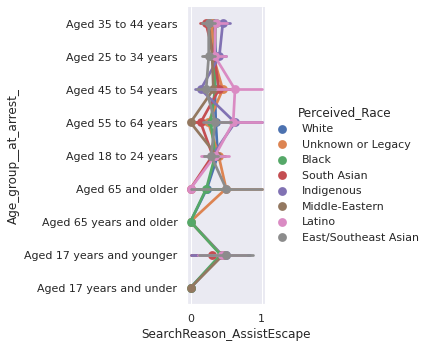

In [321]:
import pandas as pd
import seaborn as sns

# Load data from csv file
data = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Filter for relevant variables
data = data[['Perceived_Race', 'Age_group__at_arrest_', 'SearchReason_AssistEscape']]

# Create an interaction plot

sns.catplot(y='Age_group__at_arrest_', x='SearchReason_AssistEscape', hue='Perceived_Race', kind='point', data=data)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()